# 02. Neural Network for classification with PyTorch

## 1. Make classification data and get it ready

In [1]:
from sklearn.datasets import make_circles

# Make 1000 samples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples=n_samples,
                    noise=0.03,
                    random_state=42)

In [2]:
print(f"First 5 samples of X: {X[:5]}")
print(f"First 5 samples of y: {y[:5]}")

First 5 samples of X: [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
First 5 samples of y: [1 1 1 1 0]


In [3]:
# Make DataFrame of circles data
import pandas as pd
circles = pd.DataFrame({"X1": X[:, 0],
                        "X2": X[:, 1],
                        "label": y})
circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


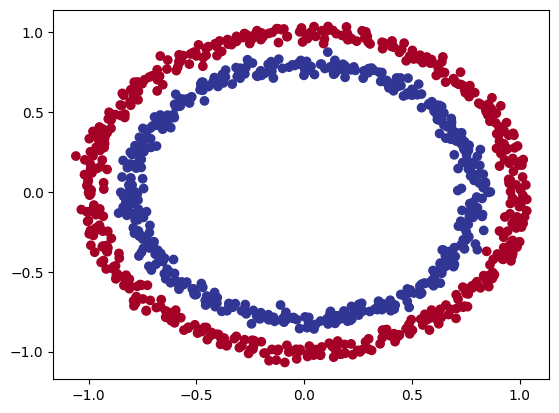

In [4]:
# Visualization
import matplotlib.pyplot as plt
plt.scatter(x=X[:, 0],
            y=X[:, 1],
            c=y,
            cmap=plt.cm.RdYlBu);

Note: The data we're working with is often referred to as a toy dataset, a dataset that is small enough to experiment but still sizeable enough to practice fundamentals.

### 1.1 Check input and output shapes

In [5]:
X.shape, y.shape

((1000, 2), (1000,))

In [6]:
# View the first example of features and labels
X_sample = X[0]
y_sample = y[0]

print(f"Values for one sample of X: {X_sample} and the same for y: {y_sample}")
print(f"Shapes for one sample of X: {X_sample.shape} and the same for y: {y_sample.shape}")

Values for one sample of X: [0.75424625 0.23148074] and the same for y: 1
Shapes for one sample of X: (2,) and the same for y: ()


### 1.2 Turn data into tensors and create train and test splits

In [7]:
import torch
torch.__version__

'2.2.2'

In [8]:
# Turn data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

In [9]:
X[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [10]:
# Split data into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
len(X_train), len(X_test)

(800, 200)

## 2. Building a model

Let's build a model to classify our blue and red dots.

Steps:
1. Setup device agnostic code (GPU or CPU)
2. Construct a model
3. Define a loss function and optimizer
4. Create a training and test loop

In [12]:
# Import pytorch
import torch
from torch import nn

# Make device agnostic code
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

Now lets create a model that:
1. Subclass `nn.Module`
2. Create 2 `nn.Linear()` layers that are capable of handling the shapes of our data
3. Defines a `forward()` method that outlines the forward pass (or forward compuation)
4. Instatiate an  instance of our model class and send it to the target `device`

In [13]:
#  Step 1. Construct a model subclass nn.Module
class CircleModelV0(nn.Module):
    def __init__(self, *args, **kwargs) -> None:
        super().__init__(*args, **kwargs)
        # Step 2. Create layers
        # self.layer_1 = nn.Linear(in_features=2, out_features=8)
        # self.layer_2 = nn.Linear(in_features=8, out_features=1)
        self.two_linear_layers = nn.Sequential(
            nn.Linear(in_features=2, out_features=8),
            nn.Linear(in_features=8, out_features=1)
        ).to(device)

    # step 3
    def forward(self, x):
        x = self.layer_1(x)
        # return self.layer_2(x)
        return self.two_linear_layers(x)

# step 4
model_0 =  CircleModelV0().to(device)

In [14]:
model_0

CircleModelV0(
  (two_linear_layers): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): Linear(in_features=8, out_features=1, bias=True)
  )
)

In [15]:
next(model_0.parameters())

Parameter containing:
tensor([[-0.5867,  0.4935],
        [-0.1350,  0.6296],
        [-0.4438,  0.6139],
        [ 0.3716, -0.3309],
        [ 0.1694, -0.3549],
        [-0.0178,  0.1063],
        [-0.6890, -0.2121],
        [-0.2872, -0.2767]], requires_grad=True)

In [16]:
# Lets replicate the model above using nn.Sequential()
model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=8),
    nn.Linear(in_features=8, out_features=1)
).to(device)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=8, bias=True)
  (1): Linear(in_features=8, out_features=1, bias=True)
)

In [17]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.0624,  0.4251],
                      [-0.0170,  0.3164],
                      [-0.5772,  0.1153],
                      [-0.3077,  0.5072],
                      [ 0.2445,  0.6684],
                      [-0.1999,  0.4971],
                      [ 0.4022, -0.1139],
                      [ 0.4840,  0.3446]])),
             ('0.bias',
              tensor([-0.2206,  0.0901,  0.0937,  0.4832, -0.5044,  0.0759,  0.6004, -0.3228])),
             ('1.weight',
              tensor([[-0.1631, -0.1936, -0.0771,  0.1844,  0.2495,  0.3160, -0.2731, -0.3472]])),
             ('1.bias', tensor([0.3194]))])

In [18]:
# Make predictions
with torch.inference_mode():
    untrained_preds = model_0(X_test.to(device))
print(f"Length of predictions: {len(untrained_preds)}, shape: {untrained_preds.shape}")
print(f"Length of test samples: {len(X_test)}, shape: {X_test.shape}")
print(f"\nFirst 10 predictions:\n{untrained_preds[:10]}")
print(f"\nFirst 10 labels:\n{y_test[:10]}")

Length of predictions: 200, shape: torch.Size([200, 1])
Length of test samples: 200, shape: torch.Size([200, 2])

First 10 predictions:
tensor([[ 0.5077],
        [ 0.4434],
        [ 0.4168],
        [ 0.5345],
        [ 0.0049],
        [-0.0312],
        [ 0.1142],
        [ 0.0020],
        [ 0.4343],
        [ 0.4345]])

First 10 labels:
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


## 2.1 Setup loss function and optimizer

Which loss function or optmizer should you use?

For regression, yo might want MAE or MSE.
For classification, you might want binary cross entropy or categorical cross entropy (cross entropy).

Lectures:
* https://towardsdatascience.com/understanding-binary-cross-entropy-log-loss-a-visual-explanation-a3ac6025181a
* https://datascience.stackexchange.com/questions/31041/what-does-logits-in-machine-learning-mean
* https://pytorch.org/docs/stable/generated/torch.nn.BCEWithLogitsLoss.html

And for optimizers, two of the most common and useful are SGD and Adam.

In [19]:
# setup loss function
# loss_fn = nn.BCELoss() # Requires inputs to have gone through the sigmoid activation function prior to input to BCE
loss_fn = nn.BCEWithLogitsLoss() # sigmoid activation function built-in

optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)

In [20]:
# Calculate accuracy
# out of 100 examples, what percentage does our model get right?
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100
    return acc

## 3. Train model

### 3.1 Going from raw logits -> prediction probabilities -> prediction labels

Our model outputs are going to be raw **logits**

We can convert these logits into predictions probabilities by passinng them to some kind of activation function (e.g. sigmoid for binary classificaion and softmax for multiclass classification).

Then we can convert our model's prediction probabilities to prediction labels by either rounding them or taking the max.

In [21]:
# view the first 5 outputs of the forward pass on the test data
model_0.eval()
with torch.inference_mode():
    y_logits = model_0(X_test.to(device))
y_logits[:5]

tensor([[0.5077],
        [0.4434],
        [0.4168],
        [0.5345],
        [0.0049]])

In [22]:
# Use the sigmoid activation function
y_pred_probs = torch.sigmoid(y_logits[:5])
y_pred_probs

tensor([[0.6243],
        [0.6091],
        [0.6027],
        [0.6305],
        [0.5012]])

For our prediction probabilities values, we need to perform a range-style rounding on them:
* `y_pred_probs` >= 0.5, `y=1` (class 1)
* `y_pred_probs` <>= 0.5, `y=0` (class 0)

In [23]:
#  Find the predicted labels
y_preds = torch.round(y_pred_probs)

# In full
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))

# Check for equality
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))

# Get rid of extra dimension
y_preds.squeeze()

tensor([True, True, True, True, True])


tensor([1., 1., 1., 1., 1.])

### 3.2 Building a training and testing loop

In [24]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set the number of epochs
epochs = 1000

# Put data to the target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Build training and evaluation loop
for epoch in range(epochs):
    ### Training
    model_0.train()

    #1. Forward pass
    y_logits = model_0(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))

    # 2. Calculate loss/accuracy
    loss = loss_fn(y_logits, y_train)
    acc = accuracy_fn(y_true=y_train,
                      y_pred=y_pred)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. loss backward
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_0.eval()
    with torch.inference_mode():
        # Forward pass
        test_logits = model_0(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))

        # 2. Calculate test loss
        test_loss = loss_fn(test_logits, y_test)
        test_acc = accuracy_fn(y_true=y_test, y_pred=test_pred)

    # Print out
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f} | Acc: {acc:.5f} | Test loss: {test_loss:.5f} | Test acc: {test_acc:.5f}")


Epoch: 0 | Loss: 0.70790 | Acc: 56.62500 | Test loss: 0.70807 | Test acc: 54.50000
Epoch: 10 | Loss: 0.69987 | Acc: 51.75000 | Test loss: 0.70101 | Test acc: 53.50000
Epoch: 20 | Loss: 0.69692 | Acc: 50.87500 | Test loss: 0.69834 | Test acc: 53.00000
Epoch: 30 | Loss: 0.69558 | Acc: 50.50000 | Test loss: 0.69707 | Test acc: 53.00000
Epoch: 40 | Loss: 0.69482 | Acc: 49.87500 | Test loss: 0.69631 | Test acc: 52.00000


Epoch: 50 | Loss: 0.69433 | Acc: 49.62500 | Test loss: 0.69580 | Test acc: 51.00000
Epoch: 60 | Loss: 0.69399 | Acc: 49.50000 | Test loss: 0.69543 | Test acc: 51.50000
Epoch: 70 | Loss: 0.69373 | Acc: 49.87500 | Test loss: 0.69515 | Test acc: 49.50000
Epoch: 80 | Loss: 0.69355 | Acc: 50.12500 | Test loss: 0.69496 | Test acc: 50.00000
Epoch: 90 | Loss: 0.69341 | Acc: 50.25000 | Test loss: 0.69481 | Test acc: 51.00000
Epoch: 100 | Loss: 0.69331 | Acc: 49.75000 | Test loss: 0.69471 | Test acc: 51.50000
Epoch: 110 | Loss: 0.69323 | Acc: 50.12500 | Test loss: 0.69463 | Test acc: 49.50000
Epoch: 120 | Loss: 0.69317 | Acc: 50.12500 | Test loss: 0.69458 | Test acc: 49.50000
Epoch: 130 | Loss: 0.69312 | Acc: 50.62500 | Test loss: 0.69455 | Test acc: 47.50000
Epoch: 140 | Loss: 0.69309 | Acc: 50.62500 | Test loss: 0.69453 | Test acc: 47.50000
Epoch: 150 | Loss: 0.69306 | Acc: 50.37500 | Test loss: 0.69452 | Test acc: 49.00000
Epoch: 160 | Loss: 0.69304 | Acc: 50.50000 | Test loss: 0.69451 | Test

## 4. Make predictions and evaluate the model

It looks the the model is not learning...

To do so, we're going to import a function called `plot_decision_boundary()`

In [25]:
import requests
# https://github.com/mrdbourke/pytorch-deep-learning/blob/main/helper_functions.py
from pathlib import Path

# Download helper functions from repository
if Path("helper_functions.py").is_file():
    print("helper_functions.py already exists... skipping")
else:
    print("Dowloading function")
    request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/refs/heads/main/helper_functions.py")
    with open("helper_functions.py", "wb") as f:
        f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

/Users/admin/courses/PyTorch-Fundamentals/venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


helper_functions.py already exists... skipping


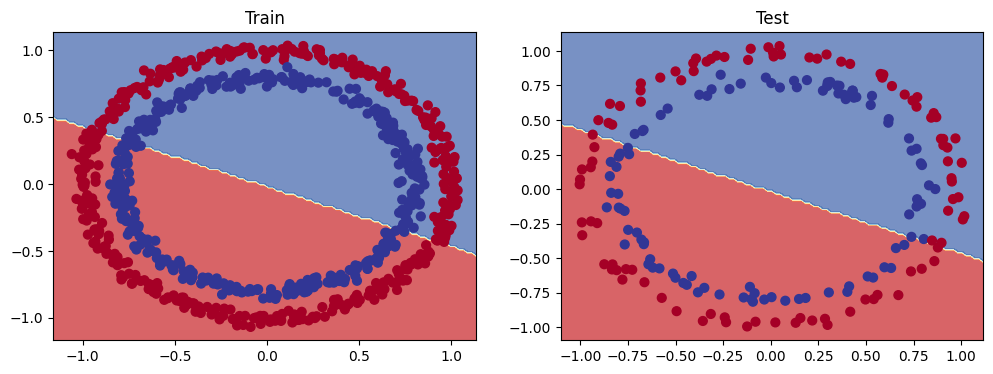

In [26]:
# Plot decision boundary
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

## 5. Improving our model (from a models perspective)

* Add more layers - give the model more chances to learn about patterns in the data
* Add more hidden units - go from 8 hidden units to 16 hidden layers
* Fit for longer - increment epochs
* Changing the activation function
* Change the learning rate
* Change the loss function

This options are all from a model's perspective because they deal with the model, rather than the data.

And because these options are all values we can change, they are referred as **hyperparameters**.

Let's try to improve our model

In [27]:
class CircleModelV1(nn.Module):
    def __init__(self, *args, **kwargs) -> None:
        super().__init__(*args, **kwargs)
        self.layer_1 = nn.Linear(in_features = 2, out_features=16)
        self.layer_2 = nn.Linear(in_features = 16, out_features=16)
        self.layer_3 = nn.Linear(in_features = 16, out_features=1)

    def forward(self, x):
        z = self.layer_1(x)
        z = self.layer_2(z)
        z = self.layer_3(z)
        return z

model_1 = CircleModelV1().to(device)
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=16, bias=True)
  (layer_2): Linear(in_features=16, out_features=16, bias=True)
  (layer_3): Linear(in_features=16, out_features=1, bias=True)
)

In [28]:
# Create a loss function
loss_fn = nn.BCEWithLogitsLoss() # sigmoid activation function built-in

# Create an optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.1)

In [29]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set the number of epochs
epochs = 1000

# Put data to the target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Build training and evaluation loop
for epoch in range(epochs):
    ### Training
    model_1.train()

    #1. Forward pass
    y_logits = model_1(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))

    # 2. Calculate loss/accuracy
    loss = loss_fn(y_logits, y_train)
    acc = accuracy_fn(y_true=y_train,
                      y_pred=y_pred)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. loss backward
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_1.eval()
    with torch.inference_mode():
        # Forward pass
        test_logits = model_1(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))

        # 2. Calculate test loss
        test_loss = loss_fn(test_logits, y_test)
        test_acc = accuracy_fn(y_true=y_test, y_pred=test_pred)

    # Print out
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f} | Acc: {acc:.5f} | Test loss: {test_loss:.5f} | Test acc: {test_acc:.5f}")


Epoch: 0 | Loss: 0.69618 | Acc: 50.00000 | Test loss: 0.69344 | Test acc: 50.00000
Epoch: 10 | Loss: 0.69401 | Acc: 42.50000 | Test loss: 0.69236 | Test acc: 47.00000
Epoch: 20 | Loss: 0.69348 | Acc: 47.37500 | Test loss: 0.69249 | Test acc: 49.50000
Epoch: 30 | Loss: 0.69328 | Acc: 48.00000 | Test loss: 0.69278 | Test acc: 50.50000
Epoch: 40 | Loss: 0.69318 | Acc: 49.12500 | Test loss: 0.69306 | Test acc: 51.00000
Epoch: 50 | Loss: 0.69312 | Acc: 51.62500 | Test loss: 0.69331 | Test acc: 47.00000
Epoch: 60 | Loss: 0.69307 | Acc: 52.12500 | Test loss: 0.69352 | Test acc: 46.00000
Epoch: 70 | Loss: 0.69304 | Acc: 51.37500 | Test loss: 0.69370 | Test acc: 46.00000
Epoch: 80 | Loss: 0.69302 | Acc: 51.00000 | Test loss: 0.69386 | Test acc: 46.00000
Epoch: 90 | Loss: 0.69301 | Acc: 50.87500 | Test loss: 0.69399 | Test acc: 47.00000
Epoch: 100 | Loss: 0.69300 | Acc: 51.25000 | Test loss: 0.69410 | Test acc: 46.00000
Epoch: 110 | Loss: 0.69300 | Acc: 51.37500 | Test loss: 0.69419 | Test acc: 

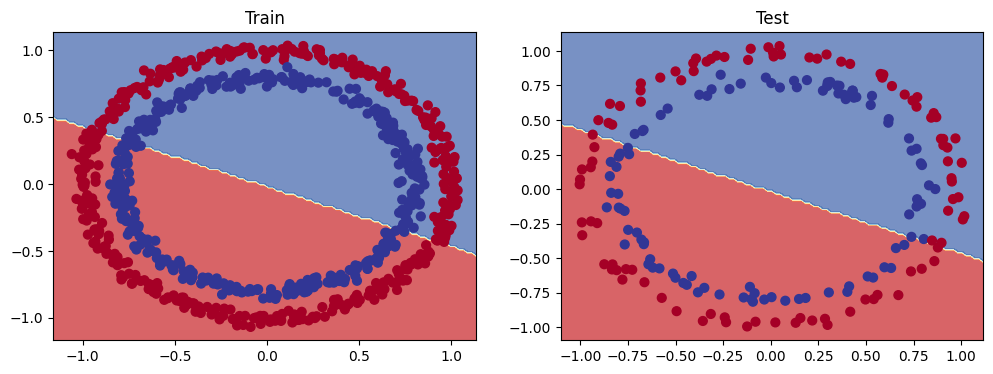

In [30]:
# Plot decision boundary
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test)

### 5.1 Preparing data to see if our model can fit a straight line

One way to troubleshoot to a larger problem is to test out a smaller problem

In [31]:
# Create dome data (same as notebbok 01)
weight = 0.7
bias = 0.3
start = 0
end = 1
step = 0.01
X_regression = torch.arange(start, end, step).unsqueeze(dim=-1)
y_regression = weight * X_regression + bias

In [32]:
X_regression[:5], y_regression[:5]

(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]))

In [33]:
# Create train and test split
train_split = int(0.8 * len(X_regression))
X_train_regression, y_train_regression = X_regression[:train_split], y_regression[:train_split]
X_test_regression, y_test_regression = X_regression[train_split:], y_regression[train_split:]

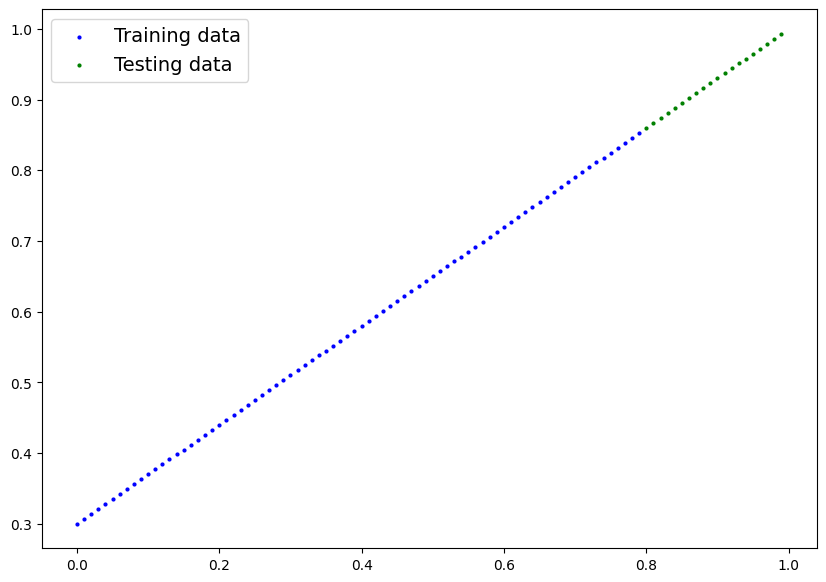

In [34]:
plot_predictions(train_data=X_train_regression,
                 train_labels=y_train_regression,
                 test_data=X_test_regression,
                 test_labels=y_test_regression)

### 5.2 Adjusting model_1 to fit a straight line

In [35]:
# Same architecture as model_1 but using nn.Sequential()
model_2 = nn.Sequential(
    nn.Linear(in_features=1, out_features=16),
    nn.Linear(in_features=16, out_features=16),
    nn.Linear(in_features=16, out_features=1),
).to(device)

model_2

Sequential(
  (0): Linear(in_features=1, out_features=16, bias=True)
  (1): Linear(in_features=16, out_features=16, bias=True)
  (2): Linear(in_features=16, out_features=1, bias=True)
)

In [36]:
# Setup a loss function
loss_fn = nn.L1Loss()

# Setup an optimizer (stochastic gradient descend)
optimizer = torch.optim.SGD(model_2.parameters(),
                            lr=0.1)

In [37]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set the number of epochs
epochs = 1000

# Put data to the target device
X_train_regression, y_train_regression = X_train_regression.to(device), y_train_regression.to(device)
X_test_regression, y_test_regression = X_test_regression.to(device), y_test_regression.to(device)

# Build training and evaluation loop
for epoch in range(epochs):
    ### Training
    model_2.train()

    #1. Forward pass
    y_pred = model_2(X_train_regression)

    # 2. Calculate loss/accuracy
    loss = loss_fn(y_pred, y_train_regression)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. loss backward
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_2.eval()
    with torch.inference_mode():
        # Forward pass
        test_pred = model_2(X_test_regression)

        # 2. Calculate test loss
        test_loss = loss_fn(test_pred, y_test_regression)

    # Print out
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f} | Test loss: {test_loss:.5f}")


Epoch: 0 | Loss: 0.44708 | Test loss: 0.32344
Epoch: 10 | Loss: 0.39794 | Test loss: 0.13093
Epoch: 20 | Loss: 0.31089 | Test loss: 0.10259
Epoch: 30 | Loss: 0.21957 | Test loss: 0.04982
Epoch: 40 | Loss: 0.09606 | Test loss: 0.14921
Epoch: 50 | Loss: 0.18629 | Test loss: 0.01874
Epoch: 60 | Loss: 0.03495 | Test loss: 0.00567
Epoch: 70 | Loss: 0.04892 | Test loss: 0.34023
Epoch: 80 | Loss: 0.04944 | Test loss: 0.15726
Epoch: 90 | Loss: 0.03212 | Test loss: 0.12676
Epoch: 100 | Loss: 0.10171 | Test loss: 0.26546
Epoch: 110 | Loss: 0.04141 | Test loss: 0.12377
Epoch: 120 | Loss: 0.08470 | Test loss: 0.24391
Epoch: 130 | Loss: 0.04792 | Test loss: 0.16330
Epoch: 140 | Loss: 0.04598 | Test loss: 0.15512
Epoch: 150 | Loss: 0.04777 | Test loss: 0.12997
Epoch: 160 | Loss: 0.05787 | Test loss: 0.22173
Epoch: 170 | Loss: 0.06178 | Test loss: 0.21377
Epoch: 180 | Loss: 0.05949 | Test loss: 0.19929
Epoch: 190 | Loss: 0.04937 | Test loss: 0.14207
Epoch: 200 | Loss: 0.04542 | Test loss: 0.13791
Epo

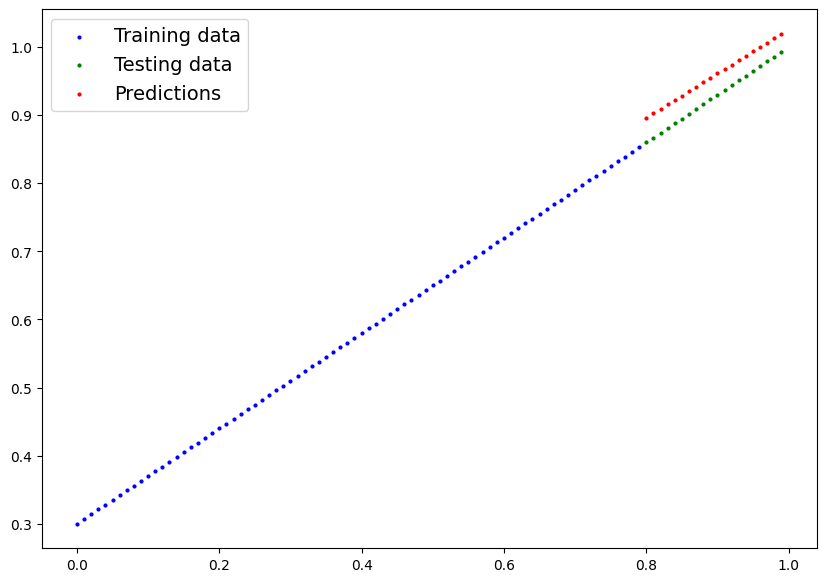

In [38]:
# Turn on evaluation mode
model_2.eval()

with torch.inference_mode():
    y_preds = model_2(X_test_regression)

plot_predictions(train_data=X_train_regression.cpu(),
                 train_labels=y_train_regression.cpu(),
                 test_data=X_test_regression.cpu(),
                 test_labels=y_test_regression.cpu(),
                 predictions=y_preds.cpu())

## 6. The missing piece: **non-linearity**

## 6.2 Recreating non-linear data

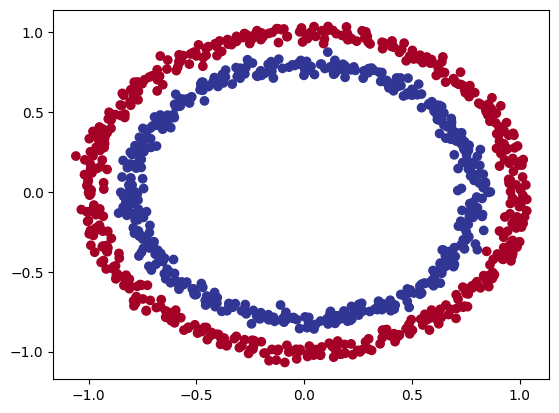

In [39]:
# Make and plot data
n_samples = 1000

# Create circles
X, y = make_circles(n_samples=n_samples,
                    noise=0.03,
                    random_state=42)

plt.scatter(x=X[:, 0],
            y=X[:, 1],
            c=y,
            cmap=plt.cm.RdYlBu);

In [40]:
# Convert data to tensors and the split them

X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 6.2 Building a model with non-linearity

Linear: straight line

Non-linear: non-straight line

In [41]:
# Build a model with non-linear activation function
class CircleModelV2(nn.Module):
    def __init__(self, *args, **kwargs) -> None:
        super().__init__(*args, **kwargs)
        self.layer_1 = nn.Linear(in_features = 2, out_features=32)
        self.layer_2 = nn.Linear(in_features = 32, out_features=16)
        self.layer_3 = nn.Linear(in_features = 16, out_features=16)
        self.layer_4 = nn.Linear(in_features = 16, out_features=1)
        self.relu = nn.ReLU()  # non-linear activation function

    def forward(self, x):
        z = self.layer_1(x)
        z = self.relu(z)
        z = self.layer_2(z)
        z = self.relu(z)
        z = self.layer_3(z)
        z = self.relu(z)
        z = self.layer_4(z)
        return z

model_3 = CircleModelV2().to(device)
model_3

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=32, bias=True)
  (layer_2): Linear(in_features=32, out_features=16, bias=True)
  (layer_3): Linear(in_features=16, out_features=16, bias=True)
  (layer_4): Linear(in_features=16, out_features=1, bias=True)
  (relu): ReLU()
)

In [42]:
# Setup loss and optimizer
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params=model_3.parameters(), lr=0.1)

### 6.3 Training a model with non-linearity

In [43]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set the number of epochs
epochs = 10000

# Put data to the target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Build training and evaluation loop
for epoch in range(epochs):
    ### Training
    model_3.train()

    #1. Forward pass
    y_logits = model_3(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))

    # 2. Calculate loss/accuracy
    loss = loss_fn(y_logits, y_train)
    acc = accuracy_fn(y_true=y_train,
                      y_pred=y_pred)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. loss backward
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_3.eval()
    with torch.inference_mode():
        # Forward pass
        test_logits = model_3(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))

        # 2. Calculate test loss
        test_loss = loss_fn(test_logits, y_test)
        test_acc = accuracy_fn(y_true=y_test, y_pred=test_pred)

    # Print out
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f} | Acc: {acc:.5f} | Test loss: {test_loss:.5f} | Test acc: {test_acc:.5f}")


Epoch: 0 | Loss: 0.70423 | Acc: 50.00000 | Test loss: 0.70389 | Test acc: 50.00000


Epoch: 100 | Loss: 0.69136 | Acc: 57.50000 | Test loss: 0.69155 | Test acc: 58.50000
Epoch: 200 | Loss: 0.68974 | Acc: 60.75000 | Test loss: 0.69023 | Test acc: 60.00000
Epoch: 300 | Loss: 0.68658 | Acc: 61.62500 | Test loss: 0.68786 | Test acc: 60.50000
Epoch: 400 | Loss: 0.68015 | Acc: 60.62500 | Test loss: 0.68266 | Test acc: 59.50000
Epoch: 500 | Loss: 0.66358 | Acc: 71.00000 | Test loss: 0.66842 | Test acc: 68.50000
Epoch: 600 | Loss: 0.60460 | Acc: 94.37500 | Test loss: 0.61768 | Test acc: 89.50000
Epoch: 700 | Loss: 0.49004 | Acc: 62.75000 | Test loss: 0.52205 | Test acc: 67.00000
Epoch: 800 | Loss: 0.40487 | Acc: 72.87500 | Test loss: 0.46074 | Test acc: 70.50000
Epoch: 900 | Loss: 0.10283 | Acc: 100.00000 | Test loss: 0.13924 | Test acc: 99.50000
Epoch: 1000 | Loss: 0.03279 | Acc: 100.00000 | Test loss: 0.05743 | Test acc: 99.50000
Epoch: 1100 | Loss: 0.01769 | Acc: 100.00000 | Test loss: 0.03710 | Test acc: 99.50000
Epoch: 1200 | Loss: 0.01166 | Acc: 100.00000 | Test loss: 0.

### 6.4 Evaluating a model trained with non-linear activation functions


In [44]:
# Make predictions
model_3.eval()
with torch.inference_mode():
    y_preds = torch.round(torch.sigmoid(model_3(X_test))).squeeze()
y_preds[:10]

tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])

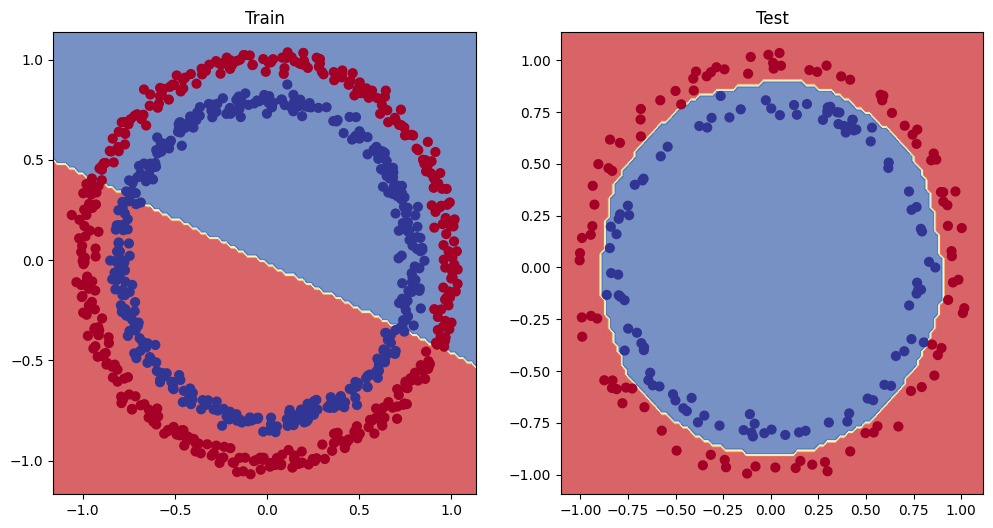

In [45]:
# Plot the decision boundaries
plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train) # no non-linearity
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_3, X_test, y_test)


## 7. Replicating non-linear activation functions

Neural networks, rather than us telling the model what to learn, we give it the tools to discover patterns in data and it tries to figure out the patterns on its own.

And these tools are linear & non-linear functions.

In [46]:
# Create a tensor
A = torch.range(-10, 10, 1, dtype=torch.float32)
A

/var/folders/5c/k9c1xp0n28v63h44vwqygqs40000gn/T/ipykernel_630/2266794655.py:2: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  A = torch.range(-10, 10, 1, dtype=torch.float32)


tensor([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
          2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.])

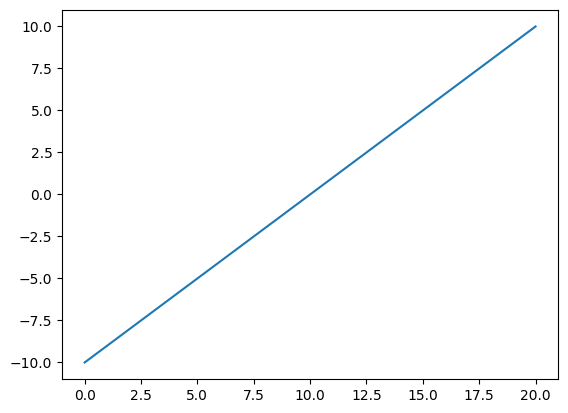

In [47]:
# Visualize the tensor
plt.plot(A)

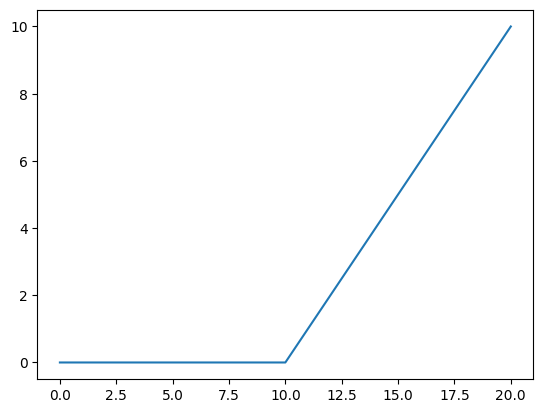

In [48]:
plt.plot(torch.relu(A))

In [49]:
def relu(x: torch.Tensor) -> torch.Tensor:
    return torch.maximum(torch.tensor(0), x) # Inputs muts be tensors

relu(A)

tensor([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  2.,  3.,
         4.,  5.,  6.,  7.,  8.,  9., 10.])

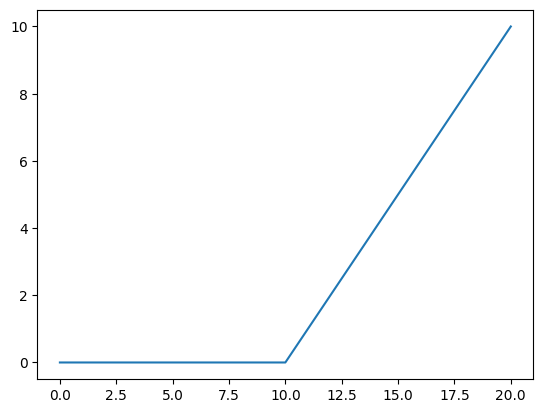

In [50]:
# plot relu activation func
plt.plot(relu(A))

In [51]:
# Sigmoid function
def sigmoid(x):
    return 1 / (1 + torch.exp(-x))

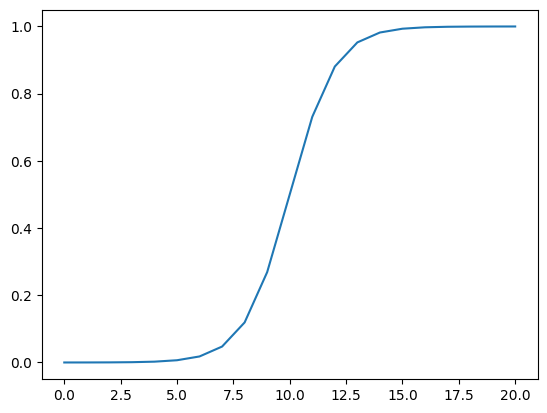

In [52]:
plt.plot(sigmoid(A))

## 8. Putting it all together with a multiclass classification problem

### 8.1 Creating a toy multiclass dataset

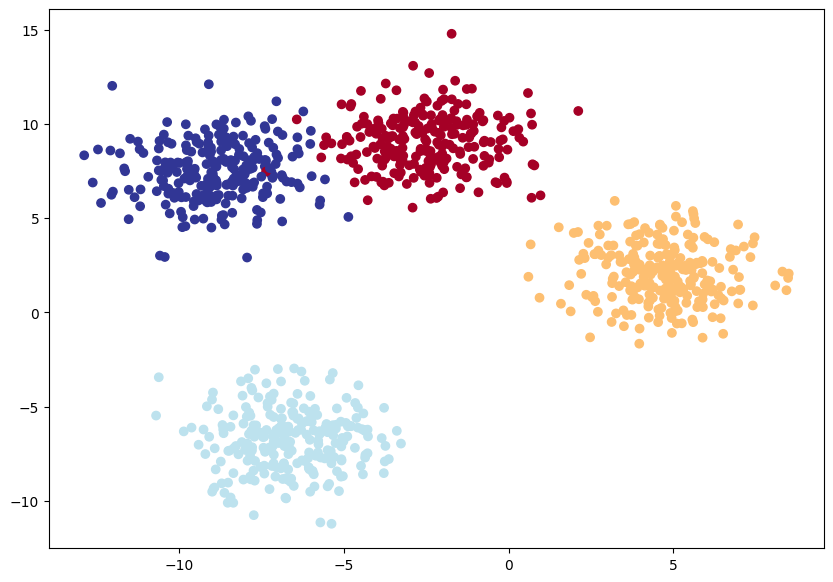

In [69]:
# Import dependencies
from sklearn.datasets import make_blobs

# Set the hyperparameters for data creation
NUM_CLASES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

# 1. Create multi-class data
X_blob, y_blob = make_blobs(n_samples=1000, n_features=NUM_FEATURES,
                            centers=NUM_CLASES, cluster_std=1.5,
                            random_state=RANDOM_SEED)

# 2. Turn data into tensors
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)

# 3. Split into train and test
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob, y_blob, test_size=0.2, random_state=RANDOM_SEED)

# 4. Plot data
plt.figure(figsize=(10, 7))
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob, cmap=plt.cm.RdYlBu)

### 8.2 Building a multiclass classification model in PyTorch

In [54]:
# Create device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [55]:
class BlobModel(nn.Module):
    def __init__(self, input_features, output_features, hidden_units=8) -> None:
        """Initializes multi-class classification model

        Args:
            input_features (int): Number of input features to the model.
            output_features (int): Number of output features
            hidden_units (int, optional): Number of hidden units between layers. Defaults to 8.
        """
        super().__init__()
        self.linear_layer_stack = nn.Sequential(
            nn.Linear(in_features=input_features, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=output_features),
        )

    def forward(self, x):
        return self.linear_layer_stack(x)

# Create an instance of BlobModel and send it to the target device
model_4 = BlobModel(input_features=2,
                    output_features=4,
                    hidden_units=8).to(device)
model_4

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=4, bias=True)
  )
)

## 8.3 Create a loss function and an optimizer for multiclass model

In [56]:
# Create a loss function for multiclass classification
loss_fn = nn.CrossEntropyLoss()

# Create an optimizer
optimizer = torch.optim.SGD(params=model_4.parameters(),
                            lr=0.1)

### 8.4 Getting predictions propabilities for a multi-class model

We need to convert our outputs (logits) to prediction probabilities and then labels.

In [61]:
# Lets get some raw outputs of our model (logits)
model_4.eval()
with torch.inference_mode():
    y_logits = model_4(X_blob_test.to(device))
y_logits[:10]

tensor([[-0.7646, -0.7412, -1.5777, -1.1376],
        [-0.0973, -0.9431, -0.5963, -0.1371],
        [ 0.2528, -0.2379,  0.1882, -0.0066],
        [-0.4134, -0.5204, -0.9303, -0.6963],
        [-0.3118, -1.3736, -1.1991, -0.3834],
        [-0.1497, -1.0617, -0.7107, -0.1645],
        [ 0.1539, -0.2887,  0.1520, -0.0109],
        [-0.2154, -1.1795, -0.9300, -0.2745],
        [ 0.2443, -0.2472,  0.1649,  0.0061],
        [-0.2329, -1.2120, -0.9849, -0.3004]])

In [60]:
y_blob_test[:10]

tensor([1., 3., 2., 1., 0., 3., 2., 0., 2., 0.])

In [63]:
# Conver our model's logit outputs to probabilities
y_pred_probs = torch.softmax(y_logits, dim=-1)
y_pred_probs[:10]

tensor([[0.3169, 0.3244, 0.1405, 0.2182],
        [0.3336, 0.1432, 0.2026, 0.3206],
        [0.3011, 0.1843, 0.2823, 0.2323],
        [0.3078, 0.2766, 0.1836, 0.2320],
        [0.3719, 0.1286, 0.1532, 0.3463],
        [0.3381, 0.1358, 0.1929, 0.3331],
        [0.2867, 0.1841, 0.2861, 0.2431],
        [0.3554, 0.1355, 0.1740, 0.3351],
        [0.3009, 0.1841, 0.2779, 0.2371],
        [0.3595, 0.1350, 0.1695, 0.3360]])

In [64]:
# Convert our models's probabilities to labels
y_preds = torch.argmax(y_pred_probs, dim=-1)
y_preds

tensor([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 3, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 1, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 3, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 1, 0, 1])

### Create a training and testing loop for a multi-class model

In [74]:
# Fitting model
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set the number of epochs
epochs = 100

# Put data to the target device
X_blob_train, y_blob_train = X_blob_train.to(device), y_blob_train.to(device)
X_blob_test, y_blob_test = X_blob_test.to(device), y_blob_test.to(device)

# Build training and evaluation loop
for epoch in range(epochs):
    ### Training
    model_4.train()

    #1. Forward pass
    y_logits = model_4(X_blob_train)
    y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)

    # 2. Calculate loss/accuracy
    loss = loss_fn(y_logits, y_blob_train)
    acc = accuracy_fn(y_true=y_blob_train,
                      y_pred=y_pred)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. loss backward
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_4.eval()
    with torch.inference_mode():
        # Forward pass
        test_logits = model_4(X_blob_test)
        test_pred = torch.softmax(test_logits, dim=-1).argmax(dim=-1)

        # 2. Calculate test loss
        test_loss = loss_fn(test_logits, y_blob_test)
        test_acc = accuracy_fn(y_true=y_blob_test, y_pred=test_pred)

    # Print out
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f} | Acc: {acc:.5f} | Test loss: {test_loss:.5f} | Test acc: {test_acc:.5f}")

Epoch: 0 | Loss: 0.03312 | Acc: 99.25000 | Test loss: 0.02433 | Test acc: 99.50000
Epoch: 10 | Loss: 0.03160 | Acc: 99.25000 | Test loss: 0.02261 | Test acc: 99.50000
Epoch: 20 | Loss: 0.03044 | Acc: 99.25000 | Test loss: 0.02126 | Test acc: 99.50000
Epoch: 30 | Loss: 0.02958 | Acc: 99.25000 | Test loss: 0.02022 | Test acc: 99.50000
Epoch: 40 | Loss: 0.02889 | Acc: 99.25000 | Test loss: 0.01940 | Test acc: 99.50000
Epoch: 50 | Loss: 0.02833 | Acc: 99.25000 | Test loss: 0.01872 | Test acc: 99.50000
Epoch: 60 | Loss: 0.02787 | Acc: 99.25000 | Test loss: 0.01815 | Test acc: 99.50000
Epoch: 70 | Loss: 0.02747 | Acc: 99.25000 | Test loss: 0.01766 | Test acc: 99.50000
Epoch: 80 | Loss: 0.02713 | Acc: 99.25000 | Test loss: 0.01723 | Test acc: 99.50000
Epoch: 90 | Loss: 0.02683 | Acc: 99.25000 | Test loss: 0.01685 | Test acc: 99.50000


### Evaluation with Pytorch

In [76]:
model_4.eval()
with torch.inference_mode():
    y_logits = model_4(X_blob_test.to(device))
y_logits[:10]

tensor([[ -0.8251,   7.4214,  -8.6492,  -9.6438],
        [ -2.4384,  -7.2530,  -4.4771,   4.0202],
        [ -4.1930,  -4.6251,   3.9723,  -3.1864],
        [ -1.4889,   5.2914,  -4.4613,  -5.5503],
        [  4.8179,  -1.4412, -10.3127,  -7.9953],
        [ -3.1214,  -8.6418,  -5.1784,   4.7837],
        [ -3.7127,  -3.9668,   3.4995,  -2.6344],
        [  4.2985,  -4.6856,  -7.8447,  -4.0603],
        [ -5.3360,  -5.9068,   4.8426,  -4.0999],
        [  4.4805,  -3.4720,  -8.5458,  -5.3922]])

In [79]:
y_preds = torch.argmax(y_logits, dim=-1)
y_preds

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0, 0, 1, 0, 0, 0, 3, 3, 2, 3, 3, 3, 0, 1, 2,
        2, 2, 3, 0, 1, 0, 3, 1, 1, 3, 1, 2, 1, 3, 0, 2, 0, 3, 3, 2, 0, 3, 1, 1,
        0, 3, 1, 0, 1, 1, 3, 2, 1, 1, 3, 2, 2, 0, 3, 2, 2, 0, 0, 3, 3, 0, 0, 3,
        3, 3, 2, 3, 3, 3, 3, 1, 0, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3, 3, 3,
        1, 0, 3, 2, 0, 0, 3, 0, 2, 3, 1, 0, 3, 2, 1, 1, 0, 2, 2, 3, 0, 0, 1, 2,
        2, 3, 0, 1, 2, 0, 0, 0, 2, 3, 1, 2, 3, 2, 0, 3, 0, 0, 1, 1, 1, 0, 2, 2,
        2, 2, 0, 3, 0, 2, 2, 1, 3, 2, 0, 0, 3, 3, 2, 1, 2, 0, 3, 2, 0, 3, 2, 0,
        2, 2, 2, 0, 3, 1, 1, 1, 1, 1, 3, 1, 0, 2, 2, 1, 2, 2, 0, 1, 2, 2, 0, 0,
        1, 3, 2, 0, 3, 1, 2, 1])

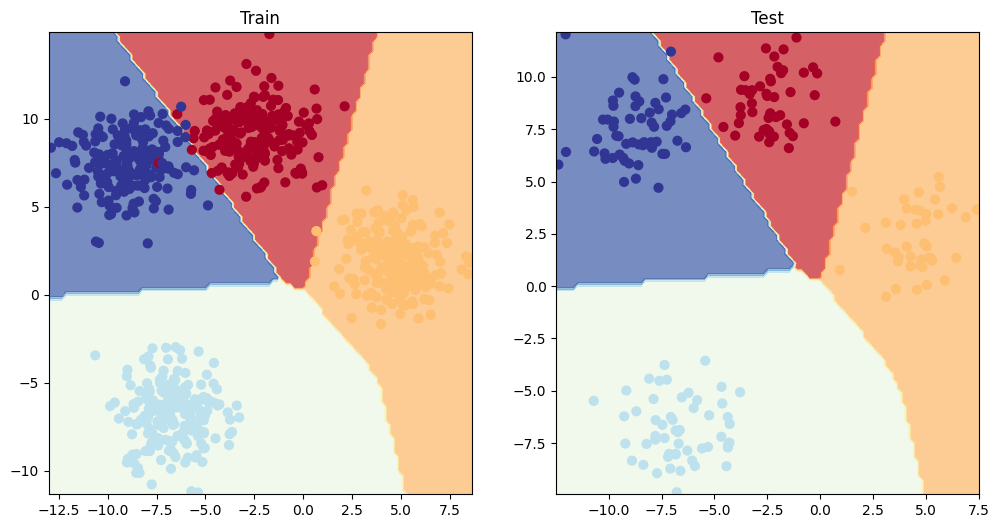

In [75]:
# Plot the decision boundaries
plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_4, X_blob_train, y_blob_train) # no non-linearity
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_4, X_blob_test, y_blob_test)

## 9. A few more classification metrics... (to evaluate our classification model)

* Accuracy
* Precision
* Recall
* F1-score
* Confusin matrix
* Classification report

[See this reference](https://towardsdatascience.com/beyond-accuracy-precision-and-recall-3da06bea9f6c).